In [1]:
import pandas as pd #para tratar os dados como dataframe(forma tabular e realizar tratamentos)
import seaborn as srn #criar alguns gráficos (realizar análise exploratoria)
import statistics as sts #Substituir alguns valores faltantes pela mediana e calcular desvio padrão para usar como parametro pra busca de outlier


In [3]:
#importando dados:
dataset = pd.read_csv("Churn.csv", sep = ";")
#Visualizando os dados:
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
#Verificar o tamanho nos nosso dados (linhas x colunas):
dataset.shape

(999, 12)

In [5]:
#Dando nome as colunas dos dados, que vimos que não possuem:
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu"]

In [7]:
#Vizualizando mudança realizadas:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [20]:
#Realizando analise exploratoria para conhecer os dados e detectar possiveis problemas - dados do Estado:
agrupado = dataset.groupby(["Estado"]).size() #Agrupa a coluna estado e pede retorno de qnt de cada
agrupado
 #Nestes dados visualizamos que temos erros de cadastro de estado (inesistentes) e de dominio (estado fora da região de dominio)
 #Usando a regra da moda (para valores categoricos) neste exemplo, iremos subtituir os valores pela moda (RS).

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

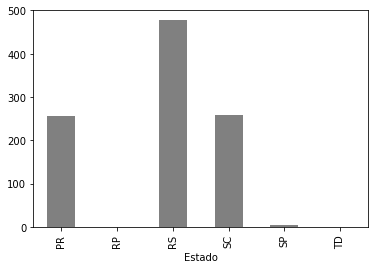

In [21]:
#Observando os Estados (dado categorico) em modo gráfico:
agrupado.plot.bar(color = "gray")
#Podemos verificar os mesmos problemas

In [22]:
#observando genero (dado categorico) em modo agrupado - Análise exploratoria:
agrupado = dataset.groupby(["Genero"]).size()
agrupado
#Podemos verificar que mesmos generos estão escritos de maneiras diferentes
#Esse tipo de problema ocorre, geralmente, quando cosolidamos dados de diferentes fontes

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

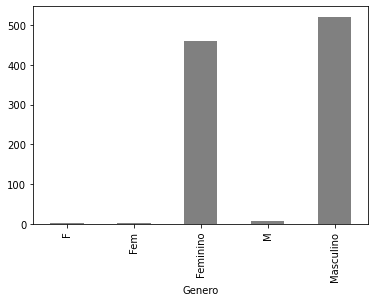

In [19]:
#Observando os generos (dado categorico) em modo gráfico:
agrupado.plot.bar(color = "gray")

In [40]:
#Observando informações estatisticas da coluna de score (dado numerico):
dataset["Score"].describe()
#Média e mediana próxima indicios que os dados não tem grandes outlier (distribição regular).
#Não foi verificado nenhuma irregularidade aparentemente.
#média = 50%

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

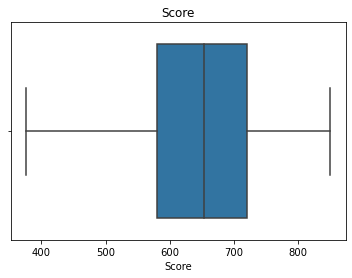

In [37]:
#Observando através de boxplot:
srn.boxplot(data=dataset, x="Score").set_title("Score")
#Ponta dos dados indica valor mais baixo e mais alto; primeira ponta do desenho 1º quartil, o meio a mediana e a ponta final do desenho 3º quartil

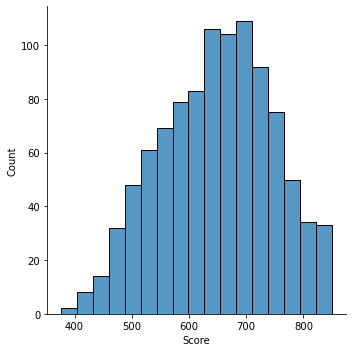

In [38]:
#Observando através do histograma:
srn.displot(data=dataset, x="Score")
#Proxima de uma distribuição normal

In [45]:
#Observando informações estatisticas da coluna de idade (dado numerico):
dataset["Idade"].describe()
#Podemos verificar alguns erros de idade, menor idade sendo negativa e idade máxima de 140 anos
#Como a media e mediana estão próximos isso indica, a principio, que esses erros não são quantidades significativas

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

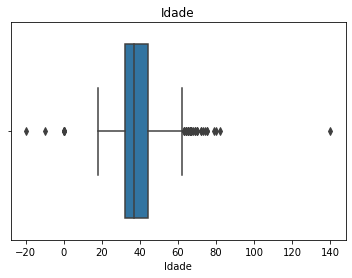

In [50]:
#Observando através de boxplot:
srn.boxplot(data=dataset, x = "Idade").set_title("Idade")
#Podemos ver os outlier , que são casos especificos

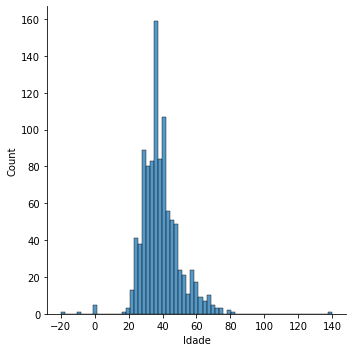

In [63]:
#Observando através do histograma:
srn.displot(data = dataset, x = "Idade")
#Dados concentrados na média e médiana. Possuimos casos espcificos como outlier. Ditribuição normal

In [66]:
#Observando informações estatisticas da coluna de saldo (dado numerico):
dataset["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

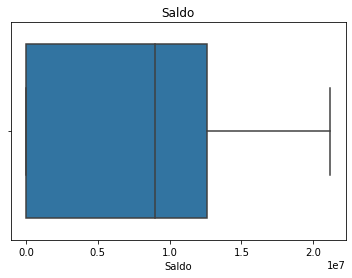

In [74]:
#Observando saldo por boxplot:
srn.boxplot(data=dataset, x = "Saldo").set_title("Saldo")

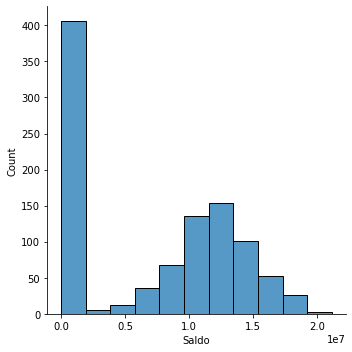

In [70]:
#Observando através do histograma:
srn.displot(data = dataset, x = "Saldo")
#Existe um grande pico de saldos com valores iguais ou proximos de zero, mas a parte bruta dos dados se concentra numa distribuição nromal ao centro

In [73]:
#Observando informações estatisticas da coluna de salário (dado numerico):
dataset["Saldo"].describe()
#Média mais longe da média indicando uma desregularidade nos salarios, mas não muito significativa

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Salario')

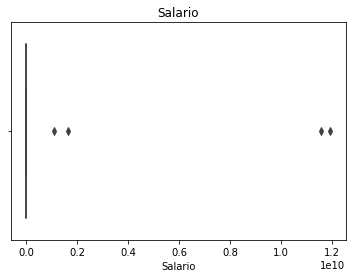

In [76]:
#Observando saldo por boxplot:
srn.boxplot(data=dataset, x = "Salario").set_title("Salario")
#Grande concetraçaõ de valores proximo doz zero, e alguns outlier longe do zero. Caso vejamos que pode impactar o modelo, podemos substituilos

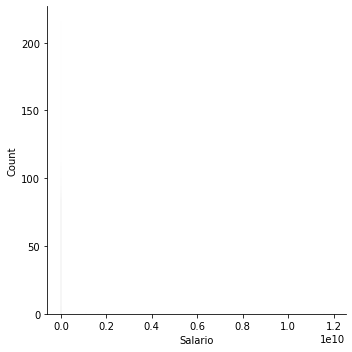

In [81]:
#Observando através do histograma:
srn.displot(data = dataset, x = "Salario")
#Podemos verificar uma grande concetraçaõ de salarios próximos a zero, isso pode indicar quemuitos clientes não informaram o salario e isso pode prejudicar a analise

In [83]:
#Para verificar se valores não foram preenchidas (NAN) e necessita-se tratar os mesmos:
dataset.isnull().sum()
#Podemos verificar 8 ocorrencia em genero e 7 ocorrencia em salario

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [84]:
#Começando o tratamento dos dados

In [86]:
#Passos para substuir valores não preenchidos na coluna salario
#Por se tratar de valores numericos substituiresmos "NAN" pela mediana
#Primeiro calculamos a mediana do salario e armazenamos em uma variável:
mediana = sts.median(dataset["Salario"])
mediana

70518.0

In [87]:
#Substituindo NAN por mediana:
dataset["Salario"].fillna(mediana, inplace=True) #Na base dataset, substitua nas celulas nan pelo valor da mediana. Na base de dados atual


In [91]:
#Verificando se valores NAN de salario foram susbtituidos:
dataset["Salario"].isnull().sum()

0

In [97]:
#Já para o caso de genero, por se tratar de valor calor categorico, vamos substituir os NAN pela moda
dataset["Genero"].fillna("Masculino", inplace = True)

In [96]:
#Verificando se os NAN foram substituidos:
dataset["Genero"].isnull().sum()

0

In [98]:
#Devido a coluna genero possuir mesmos generos escritos de maneiras distintas, iremos padronizar:
dataset.loc[dataset["Genero"] == "M", "Genero"] = "Masculino"
dataset.loc[dataset["Genero"].isin( [ "Fem", "F"]), "Genero"] = "Feminino"
#Visualizando o resultado:
agrupado =dataset.groupby(["Genero"]).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [106]:
#Ajustando as idades fora do dominio:
#Visualizando dados em que a coluna idade é menor que 0 e maior que 120:
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [102]:
#Calculando a mediana da idade - mediana é menos sujeitas a valores outliers (valores fora do padrão) do que a é média:
mediana = sts.median(dataset["Idade"])
mediana

37

In [104]:
#Substituindo idades fora do dominio pela mediana:
dataset.loc[(dataset["Idade"] < 0 ) | (dataset["Idade"] > 120), "Idade"] = mediana
             

In [105]:
#Verificando se ainda existe idade fora do dominio: 
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [107]:
#Verificando se existe dados duplicados pel ID que é único por cliente:
dataset[dataset.duplicated(["Id"], keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [108]:
#Excluindo pelo ID a duplicidade:
dataset.drop_duplicates(subset = "Id", keep = "first", inplace = True)
#Verificando se ainda existe duplicidade após exclusão:
dataset[dataset.duplicated(["Id"], keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [111]:
#Para os Estados fora dominio, iremos substituir pela moda:
dataset.loc[dataset["Estado"].isin(["RP", "SP", "TD"]), "Estado"] = "RS"
#Verificando se ainda existe Estados fora do dominio:
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [112]:
#Para salario iremos utilizar como outliers todos salarios que forem maiores que 2 desvios padrão
#Identificando desvio padrão da variável salario:
desv = sts.stdev(dataset["Salario"])
desv

528988918.4679201

In [113]:
#Verificando se existe algum salario acima de 2 * desvio padrão do salario:
dataset.loc[dataset["Salario"] >= 2 * desv]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [114]:
#Calculando a mediana do salario para realizar a substituição:
mediana = sts. median(dataset["Salario"])
mediana

8637195.5

In [116]:
#Subtituindo os salarios outliers pela mediana:
dataset.loc[dataset["Salario"] >= 2 * desv, "Salario"] = mediana
#Verificando se susbtituições foram realizada com sucesso:
dataset.loc[dataset["Salario"] >= 2* desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [117]:
#Verificando como estão os dados após tratamento:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [119]:
#Verificando se a dimensão da base de dados após tratamento:
dataset.shape

(998, 12)